In [6]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the zip file
zip_path = 'data/mazala11.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('data/working')

# List extracted files to understand the structure
extracted_files = zip_ref.namelist()
extracted_files

['competitors.csv', 'rounds.csv', 'submissions.csv', 'votes.csv']

In [8]:
# Load the CSV files into pandas DataFrames
competitors_df = pd.read_csv('data/working/competitors.csv')
rounds_df = pd.read_csv('data/working/rounds.csv')
submissions_df = pd.read_csv('data/working/submissions.csv')
votes_df = pd.read_csv('data/working/votes.csv')

# Display the first few rows of each DataFrame to understand their structure
#competitors_df.head(), rounds_df.head(), submissions_df.head(), votes_df.head()


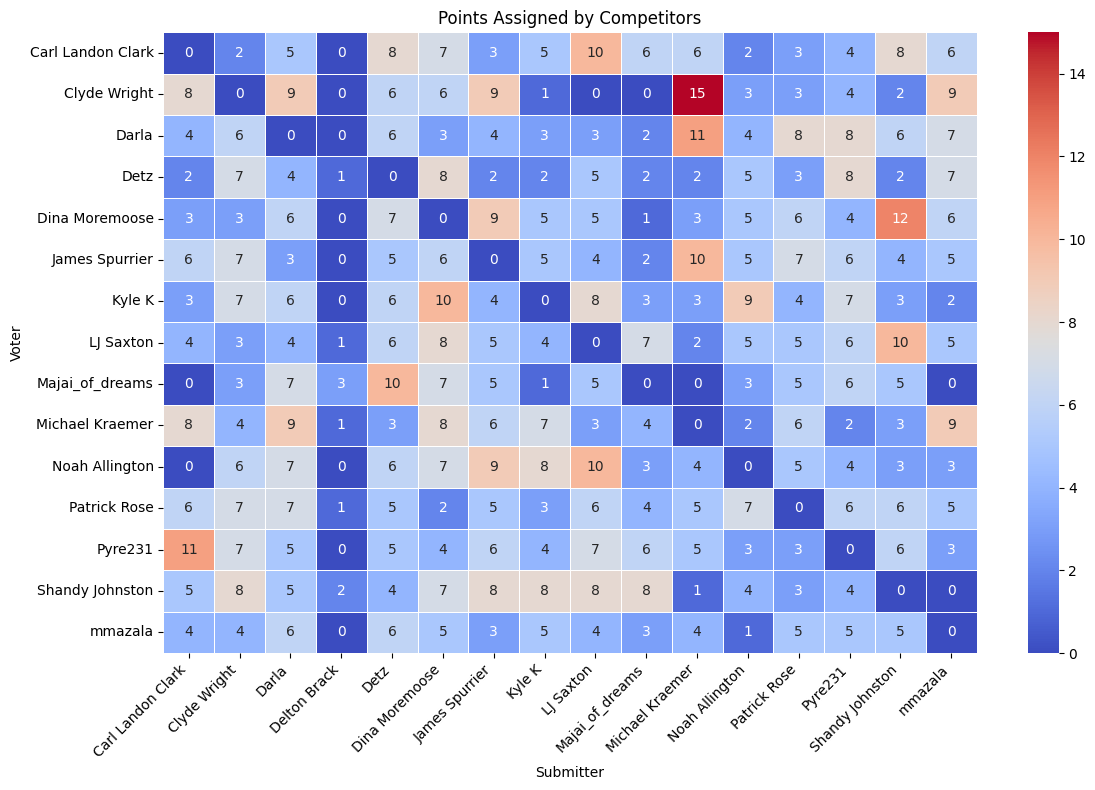

In [9]:
# Merge the DataFrames to create a comprehensive dataset for the heat map
# Merging votes with submissions to get the submitter information
votes_with_submissions = votes_df.merge(submissions_df, on='Spotify URI', suffixes=('_vote', '_submission'))

# Merging with competitors to get voter and submitter names
votes_with_voters = votes_with_submissions.merge(competitors_df, left_on='Voter ID', right_on='ID')
votes_with_voters = votes_with_voters.rename(columns={'Name': 'Voter Name'}).drop(columns=['ID'])

# Correct the merge by using 'Submitter ID' instead of 'Competitor ID'
votes_with_submitters = votes_with_voters.merge(competitors_df, left_on='Submitter ID', right_on='ID')
votes_with_submitters = votes_with_submitters.rename(columns={'Name': 'Submitter Name'}).drop(columns=['ID', 'Voter ID', 'Submitter ID', 'Spotify URI', 'Round ID_vote', 'Round ID_submission', 'Created_vote', 'Created_submission', 'Title', 'Album', 'Artist(s)', 'Visible To Voters'])

# Aggregate points assigned by each competitor to others
points_matrix = votes_with_submitters.pivot_table(index='Voter Name', columns='Submitter Name', values='Points Assigned', aggfunc='sum', fill_value=0)

# Create a heat map
plt.figure(figsize=(12, 8))
sns.heatmap(points_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Points Assigned by Competitors')
plt.xlabel('Submitter')
plt.ylabel('Voter')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()